In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Versión de Tensorflow: ", tf.__version__)

Versión de Tensorflow:  2.3.0


In [4]:
# apunta  los datos
mnist = tf.keras.datasets.mnist

# lee los conjuntos de datos, los cuales vienen separados de antemano para entrenamiento y test
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Verificar forma de los datos
print("Forma de los datos:",training_images.shape)

11493376/11490434 [==============================] - 0s 0us/step
Forma de los datos: (60000, 28, 28)


In [5]:
# reshape para colocar los datos de entrenamiento en el fomato apropiado.
# Agrega una dimensión al final y  normaliza los datos
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

# reshape para colocar los datos de test en el fomato apropiado. Agrega una dimensión al final y  normaliza los datos
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

print("Nueva forma de los datos:", training_images.shape)

Nueva forma de los datos: (60000, 28, 28, 1)


Datos en bruto

[[0.99215686 0.99215686 0.99215686 0.99215686 0.99215686]
 [0.99215686 0.99215686 0.97647059 0.83529412 0.83529412]
 [0.99215686 0.99215686 0.55294118 0.         0.        ]
 [0.99215686 0.8745098  0.15294118 0.         0.        ]
 [0.88235294 0.14901961 0.         0.         0.        ]] 

Imagen Asociada



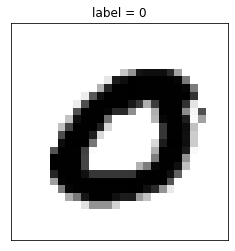

In [6]:
# muestra una imagen de entranamiento
azar=np.random.randint(len(training_images))
print("Datos en bruto\n")
print(training_images[azar,10:15,10:15,0],'\n')


print("Imagen Asociada\n")
plt.imshow(training_images[azar,:,:,0],cmap='binary')
plt.xticks([], [])
plt.yticks([], [])
plt.title('label = ' +str(training_labels[azar]))
plt.show()

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [9]:
class MNIST_Callback(tf.keras.callbacks.Callback):
    
    # método dentro de la clase myCallback, heredada de la clase Callback de keras
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.99):
            print("\nSe alcanzó un 99.9% de precisión en la validación! Cancelando Entrenamiento...")
            self.model.stop_training = True

# crea una instancia de clase
accu_callback = MNIST_Callback()

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(training_images, training_labels, 
                    epochs=20, 
                    validation_split=0.2, 
                    batch_size=64,
                    callbacks=[accu_callback])

Epoch 1/20
750/750 [==============================] - 24s 32ms/step - loss: 0.2014 - accuracy: 0.9415 - val_loss: 0.0755 - val_accuracy: 0.9781
Epoch 2/20
750/750 [==============================] - 24s 32ms/step - loss: 0.0613 - accuracy: 0.9814 - val_loss: 0.0612 - val_accuracy: 0.9819
Epoch 3/20
750/750 [==============================] - 24s 32ms/step - loss: 0.0395 - accuracy: 0.9882 - val_loss: 0.0548 - val_accuracy: 0.9830
Epoch 4/20
750/750 [==============================] - 24s 32ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0611 - val_accuracy: 0.9817
Epoch 5/20
750/750 [==============================] - 24s 32ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0520 - val_accuracy: 0.9853
Epoch 6/20
750/750 [==============================] - 24s 31ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0585 - val_accuracy: 0.9842
Epoch 7/20
750/750 [==============================] - 26s 35ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.0560 - val_accuracy:

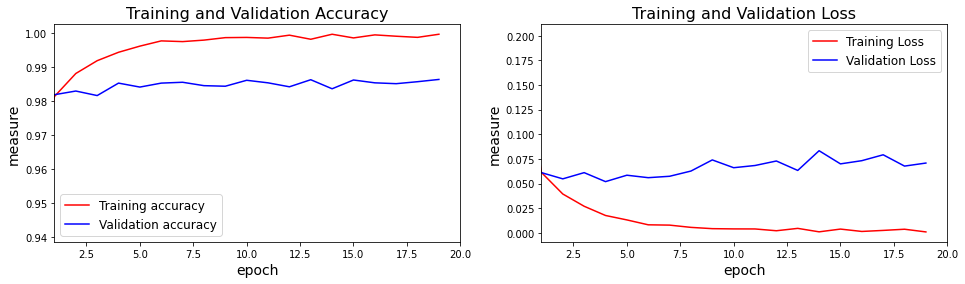

In [12]:
import matplotlib.pyplot as plt

# Del objeto history, podemos sacar la información guardada a traveś del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

n_row = 1
n_col = 2
fig, ax = plt.subplots(n_row, n_col, sharex = False, sharey = False, figsize=(16,4))


ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(fontsize=12,loc=0)
ax[0].set_title('Training and Validation Accuracy',fontsize=16)
ax[0].set_ylabel('measure',fontsize=14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].set_xlim([1, len(acc)])

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].legend(fontsize=12)
ax[1].set_title('Training and Validation Loss',fontsize=16)
ax[1].set_ylabel('measure',fontsize=14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].set_xlim([1, len(acc)])


plt.show()